In [1]:
import json
from matplotlib import pyplot as plt

In [44]:
def plot_finetuning_results(file_path, model_name):
    assert model_name in ["Faster R-CNN", "Mask R-CNN"]

    # Open
    with open(file_path, 'r') as handle:
        json_data = [json.loads(line) for line in handle]

    train_loss, val_loss = [], []
    ap_bbox, ap_car_bbox, ap_person_bbox = [], [], []
    if model_name == "Mask R-CNN":
        ap_segm, ap_car_segm, ap_person_segm = [], [], []
            
    for result_line in json_data:
        if "validation_loss" in list(result_line.keys()):
            train_loss.append(result_line["total_loss"])
            val_loss.append(result_line["validation_loss"])
        if "bbox/AP-car" in list(result_line.keys()):
            ap_bbox.append(result_line["bbox/AP"])
            ap_car_bbox.append(result_line["bbox/AP-car"])
            ap_person_bbox.append(result_line["bbox/AP-person"])
            if model_name == "Mask R-CNN":
                ap_segm.append(result_line["segm/AP"])
                ap_car_segm.append(result_line["segm/AP-car"])
                ap_person_segm.append(result_line["segm/AP-person"])

    iters_xs = [i for i in range(1, len(train_loss)*100 + 1, 100)]
    num_of_nan_aps = len(train_loss) - len(ap_bbox)

    # Loss plot
    fig, ax1 = plt.subplots(ncols=1, nrows=1)
    ax1.plot(iters_xs, train_loss, label="Train Loss")
    ax1.plot(iters_xs, val_loss, label="Validation Loss")
    ax1.set_xlabel("Iterations")
    ax1.set_title(f"{model_name}: Loss")
    ax1.legend()
    
    # AP, bbox task
    fig, ax2 = plt.subplots(ncols=1, nrows=1)
    ax2.plot(iters_xs, num_of_nan_aps*[0] + ap_bbox, label="Mean AP")
    ax2.plot(iters_xs, num_of_nan_aps*[0] + ap_car_bbox, label="Car AP")
    ax2.plot(iters_xs, num_of_nan_aps*[0] + ap_person_bbox, label="Person AP")
    ax2.set_xlabel("Iterations")
    ax2.set_title(f"{model_name}: BBox AP evolution")
    ax2.legend()
    
    # AP, segmentation task (Only Mask R-CNN)
    ax3 = None
    if model_name == "Mask R-CNN":
        fig, ax3 = plt.subplots(ncols=1, nrows=1)
        ax3.plot(iters_xs, num_of_nan_aps*[0] + ap_segm, label="Mean AP")
        ax3.plot(iters_xs, num_of_nan_aps*[0] + ap_car_segm, label="Car AP")
        ax3.plot(iters_xs, num_of_nan_aps*[0] + ap_person_segm, label="Person AP")
        ax3.set_xlabel("Iterations")
        ax3.set_title(f"{model_name}: Segmentation AP evolution")
        ax3.legend()
    return ax1, ax2
            

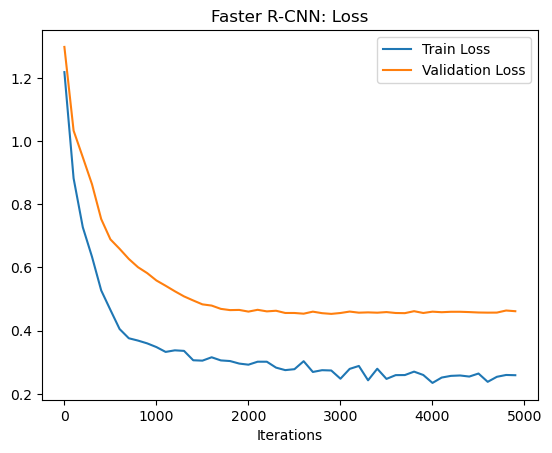

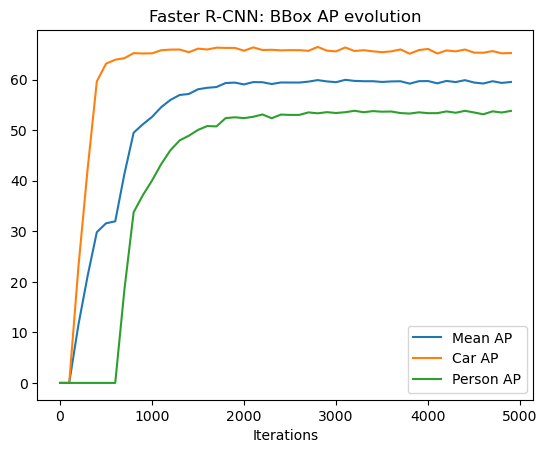

In [45]:
plot_finetuning_results('output/finetuned_faster_rcnn/metrics.json', "Faster R-CNN");

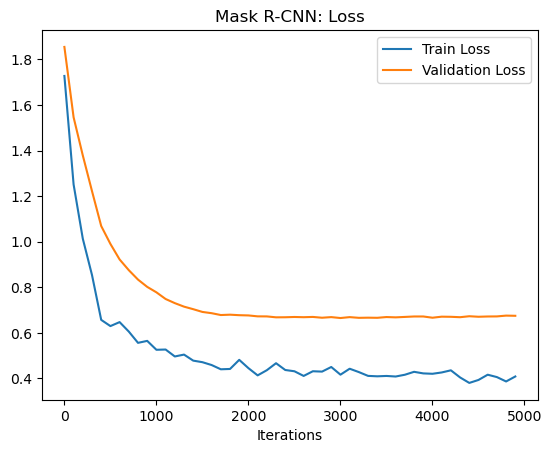

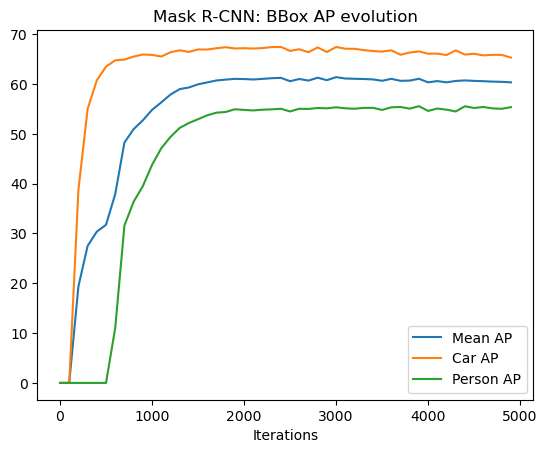

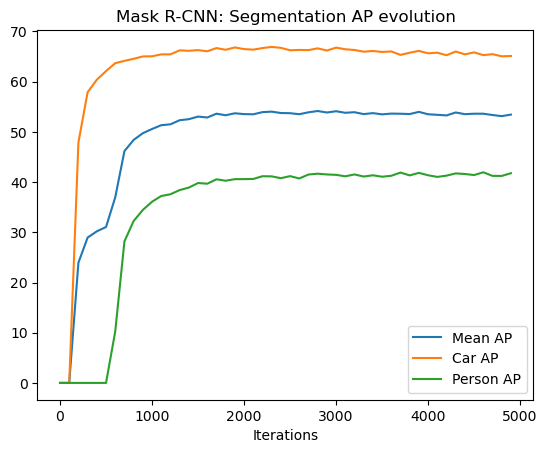

In [46]:
plot_finetuning_results('output/finetuned_mask_rcnn/metrics.json', "Mask R-CNN");

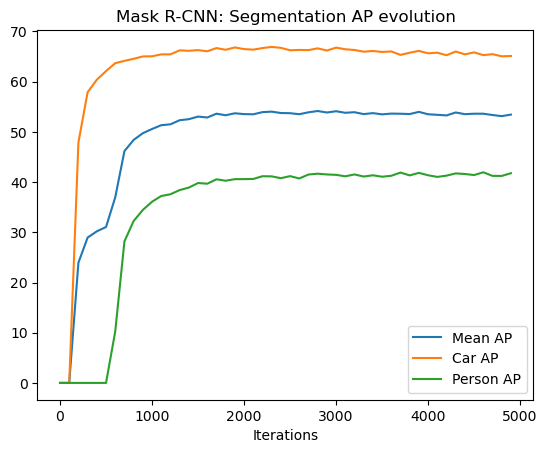

In [13]:
x = [i for i in range(1, (len(ap)+2)*100+1, 100)]
plt.plot(x, [0, 0] + ap_segm, label="Mean AP");
plt.plot(x, [0, 0] + ap_car_segm, label="Car AP");
plt.plot(x, [0, 0] + ap_person_segm, label="Person AP");
plt.xlabel("Iterations")
plt.title("Mask R-CNN: Segmentation AP evolution")
plt.legend()
plt.show();